In [4]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import constants
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv("weight-height.csv")
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
df['Weight'] = np.around(df['Weight'] * constants.pound, 1)
df['Height'] = np.around(df['Height'] * constants.inch * 100)
df['Height'] = df['Height'].astype(np.int64, errors='ignore')
df.head()

,Gender,Height,Weight
0,Male,188,109.7
1,Male,175,73.6
2,Male,188,96.5
3,Male,182,99.8
4,Male,177,93.6


In [7]:
df['Gender'].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

<Axes: xlabel='Height', ylabel='Weight'>

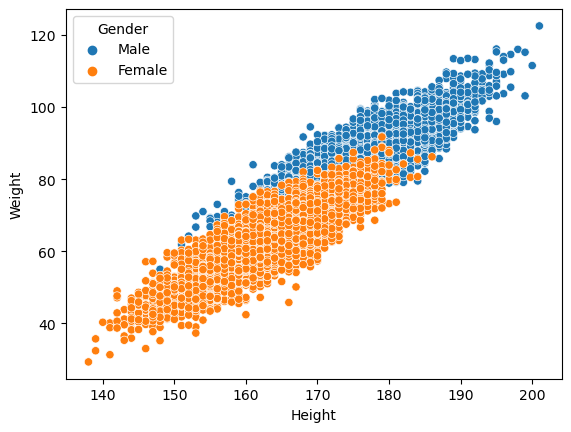

In [16]:
sns.scatterplot(data=df, y='Weight', x='Height', hue='Gender')

In [17]:
df.Gender = df.Gender.map({"Male" : 0, "Female" : 1})
df.sample(n=10)

,Gender,Height,Weight
2918,0,182,85.8
8790,1,155,50.0
4464,0,182,94.5
1846,0,177,83.6
1980,0,179,84.9
858,0,177,85.7
8126,1,169,62.9
5221,1,149,45.5
4222,0,175,88.2
3515,0,170,80.4


In [18]:
X = df[ ["Gender", "Height"] ]
y = df[ ["Weight"] ]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [20]:
lin_reg.score(X_test, y_test)

0.907925871337883

In [21]:
np.round(lin_reg.predict([[0, 180]])[0][0],1)

/Users/macbook/.conda/envs/pitrArc/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.8

In [22]:
joblib_file = "WeightPredictionModel.joblib"
joblib.dump(lin_reg, joblib_file)

['WeightPredictionModel.joblib']